# 8 Queens Puzzle solved using Genetic algorithm

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist


def pop(nb_lignes):
    """ 
    this func inistiatizes a nb_ligneX8 matrix with random values
    ranging from 0 to 7 """
    
    return np.random.randint(8,size=(nb_lignes,8))

In [2]:

def fitness(pop):
    """ 
    this func loops over the individuals in the pop, for each ind it checks whether
    each pos of queen has a target either diagonally or horizontally
    if there happens to be one both parties get each 1 added to their pos in the
    fitness_list, once we check all the pos of queen on the right (j reached 8, i=1 next),
    it starts checking from the ith + 1 pos to avoid redundancy """
 
    
    fitness_list=[]
    max=-1000
    for T in pop:
        tab=np.zeros(8)
        for i in range(8):
            for j in range(i+1,8):
                if(T[j]==T[i]-j+i):
                    tab[i]+=1
                    tab[j]+=1

                if(T[j]==T[i]+j-i):
                    tab[i]+=1
                    tab[j]+=1  

                if(T[i]==T[j]):
                    tab[i]+=1
                    tab[j]+=1   
                    
        fitness_list.append(-sum(tab))            
            
                
    return fitness_list

In [3]:
def Selection(popu, fitness_pop):
    """
    this func computes -a weighted list- and the probability of each fitness based on the list,
    then chooses randomly indexes with respect to the heighest probabilities
    it returns the correspondant population """
    
    new_list=fitness_pop-min(fitness_pop)+1
    probabilités = new_list/sum(new_list)
    indices = np.arange(fitness_pop.shape[0])
    ind_pop=np.random.choice(indices, size=fitness_pop.shape[0], p=probabilités)
   
    return popu[tuple([ind_pop])]

In [4]:
def crossover(parent1, parent2, Threshold):
    # this func crosses over two parents : parent1 and parent2, by taking one slice of the former 
    # and concatenate it with a slice of the latter, same goes for child2, the slicing is done based on a
    # random int m, this occurs only if the threshold we chose is greater than and random number r 
    
    
    r = np.random.random()
    if(r < Threshold):
        m = np.random.randint(1,8)
        
        child1 = np.concatenate([parent1[:m],parent2[m:]])
        child2 = np.concatenate([parent2[:m],parent1[m:]])
    else:
        child1=parent1.copy()
        child2=parent2.copy()
        
    return child1,child2

In [5]:
def mutation(individu, proba_mutation):
    # this func changes random position's value in an individual with a random integer < 8
    # only if a random r is lower than a certain small proba_mutation
    
    r = np.random.random()
    if r < proba_mutation:
        m = np.random.randint(8)
        individu[m] = np.random.randint(8)
    return individu

In [6]:
def crossover_mutation(A, Threshold, proba_mutation):
    # this func combines both crossover and mutation to render a list of crossed over/mutated individuals

    liste_children_mute = []
    for i in range(0,A.shape[0],2):
        for Ind in crossover(A[i], A[i+1], Threshold):
            b = mutation(Ind, proba_mutation)
            liste_children_mute.append(b)
    
   
    return np.array(liste_children_mute)

In [7]:
def eight_queens(taille_pop, max_gen, Threshold, proba_mutat):
    # this func assembles all the ingredients needed for the eight_queens recipe
    # it tries to maximize the fitness i.e. minimize the penalty (0 is the best one)
    # it takes as parameters the size of pop, max iterations, a threshold and a mutation probability   
    # it then creates a population, computes the best fitness and repeats the process until this best
    # fitness reaches 0, the respective individual is the optimum solution 

    population = pop(taille_pop)
    la_meilleure_fitness = 0
    for ig in range(max_gen):
        liste_fitness = np.array(fitness(population))
        meilleur_ind  = liste_fitness.argmax()
        meilleure_fitness = liste_fitness[meilleur_ind]
        if(la_meilleure_fitness == 0 or meilleure_fitness > la_meilleure_fitness):
            la_meilleure_fitness = meilleure_fitness
            meilleure_solution = population[meilleur_ind]
        
        if meilleure_fitness == 0 :
            break;
            
        pop_selectionnée = Selection(population, liste_fitness) 
        population = crossover_mutation(pop_selectionnée, Threshold, proba_mutat)
    print(meilleure_fitness,"à la ",ig," ième gen")
            
    return meilleure_solution 

In [8]:
def visualisation(L):
    
    A = np.ones((8, 8), dtype = np.uint)
    for j in range(L.shape[0]):
        A[L[j],j] = 0

    fig = plt.figure()

    
    colormap = plt.cm.binary
    plt.matshow(A, cmap=colormap)
    plt.colorbar()

    ax = plt.gca()

    ax.set_xticks(np.arange(-.5, (8), 1), minor=True)
    ax.set_yticks(np.arange(-.5, (8), 1), minor=True)

    ax.grid(which='minor', color='w', linestyle='-', linewidth=1)

    plt.xticks([])
    plt.yticks([])
    plt.show() 

In [9]:
# Test
L = eight_queens(1000, 10000, 0.7, 0.01)


-0.0 à la  23  ième gen


[4 6 1 3 7 0 2 5]


<Figure size 640x480 with 0 Axes>

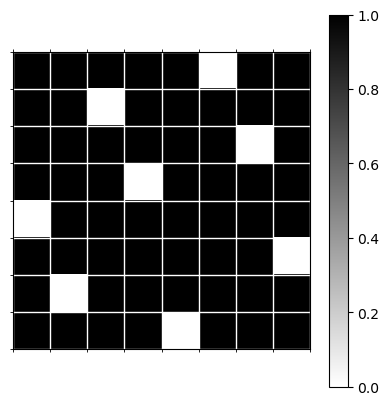

In [10]:
print(L)
visualisation(L)